# Chicago Weather Records, November 2017

### Frist we have to import the libraries we are going to use int this analysis.

In [20]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import json

### After importing,  we are going to get the data of the [website](https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html) to begin our analysis

In [ ]:
# Request the data via HTTP GET
response = requests.get('https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html', params={"id": "weather_records"})
#Using Beautifulshop we separate it into xml elements
soup = BeautifulSoup(response.text, 'lxml')

# We get the information inside th elements of the table
head_list = []
for head in soup.find_all('th'):
    head_list.append(head.text)

# We get the information inside td elements of the table
date_list = []
temp_list = []
desc_list = []
for row in soup.find_all('tr'):
    tds = row.find_all('td')
    # Ignore the th elements
    if len(row.find_all('th')) != 0:
        continue
    # Gets the date
    if len(tds) >= 0:
        date_list.append(tds[0].text)
    # Gets the temperature
    if len(tds) >= 1:
        temp_list.append(tds[1].text)
    # Gets the description of weather
    if len(tds) >= 2:
        desc_list.append(tds[2].text)

# Creates a dataframe with the information gathered of the td elements
weather_records = pd.DataFrame({'date':date_list, 'temperature':temp_list, 'description':desc_list})
# Sets the title of the DF as the title of the table on the website
weather_records.columns = [head_list]
# Reveals the DataFrame
weather_records

,Date and time,Temperature,Description
0,2017-11-01 00:00:00,276.150,broken clouds
1,2017-11-01 01:00:00,275.700,scattered clouds
2,2017-11-01 02:00:00,275.610,overcast clouds
3,2017-11-01 03:00:00,275.350,broken clouds
4,2017-11-01 04:00:00,275.240,broken clouds
...,...,...,...
692,2017-11-29 20:00:00,281.340,few clouds
693,2017-11-29 21:00:00,281.690,sky is clear
694,2017-11-29 22:00:00,281.070,few clouds
695,2017-11-29 23:00:00,280.060,sky is clear


### Having done a filtration about the data coming from the [website](https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html), I came with the next results with the help of data collections we had on the Chicago taxis:

In [51]:
# Number of company names with ther number of trips
df_company_trips = pd.read_csv('./moved_project_sql_result_01.csv')
# Average of trips per dropoff location
df_avg_dropoff_trips = pd.read_csv('./moved_project_sql_result_04.csv')
# Show the time, condition of weather and the duration in seconds of the trip
# These are also trips only from Loop to O'Hare International Airport
df_time_weather_duration = pd.read_csv('./moved_project_sql_result_07.csv')

In [18]:
df_company_trips

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


In [6]:
df_avg_dropoff_trips

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [7]:
df_time_weather_duration

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


## Filtering data

#### First we set the correct types to our dataframes

In [9]:
df_company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


This set looks correctly set on both no null values and data types

In [10]:
df_avg_dropoff_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


This also set looks correctly set on both no null values and data types

In [11]:
df_time_weather_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [17]:
# Cast the column "start_ts" into a datetime column
df_time_weather_duration['start_ts'] = pd.to_datetime(df_time_weather_duration['start_ts'])
df_time_weather_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


With that we are done on cleaning and filtering the data, now we have usefull collections we can work with

## Deep analysis on Chicago trips

### What are the main Chicago neighborhoods where a trip finishes

In [19]:
df_avg_dropoff_trips.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


We can observe the most visited trips end on Loop neighborhood at the 1st place and River North not that far away in numbers too, meanwhile down the table the locations start to be less and less visited.

### Graphics

#### Taxi Company per Trip count graphic

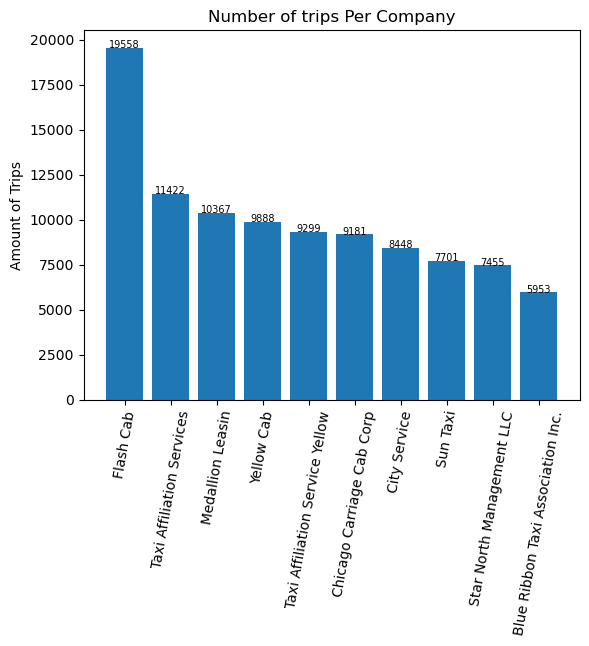

In [49]:
# Get the 10 Companies base on the number of most trips
top_10_company_trips = df_company_trips.head(10)
plt.bar(top_10_company_trips['company_name'], top_10_company_trips['trips_amount'])
# Add value on the top of the bar
for i, v in enumerate(top_10_company_trips['trips_amount']):
    plt.text(i, v + 5, str(v), ha='center', fontsize=7)

# Graphic Custom Settings
plt.xticks(rotation=80)
plt.title('Number of trips Per Company')
plt.ylabel('Amount of Trips')
plt.show()

In the previous graphic we can observe which are the best 10 companies of taxis in Chicago with their respective numbers. We can also say that Flash Cab is above the other competition for almost the doble of the 2nd place competitor on the industry. Meanwhile, the other 8 places behind stay at a very high level of competency.

#### 10 principal neighborhoods per dropoffs

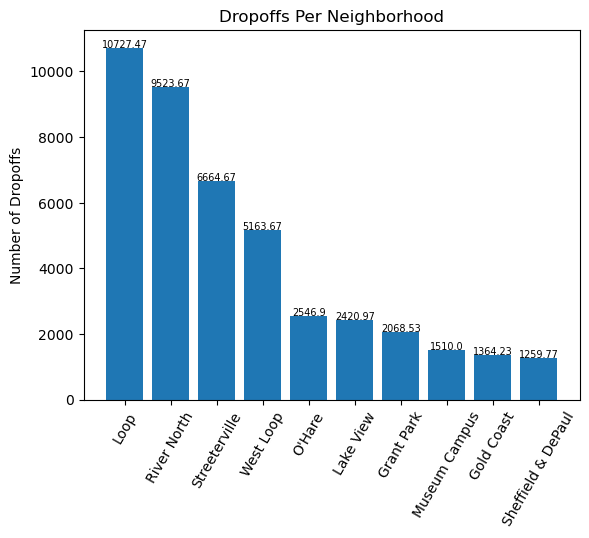

In [ ]:
# Get the 10 Neighborhoods where more dropoffs ocurr
top_10_neighborhoods_dropoffs = df_avg_dropoff_trips.head(10)
# Make a bar graphic
plt.bar(top_10_neighborhoods_dropoffs['dropoff_location_name'], top_10_neighborhoods_dropoffs['average_trips'])
# Add value on the top of the bar
for i, v in enumerate(top_10_neighborhoods_dropoffs['average_trips']):
    plt.text(i, v + 5, str(round(v,2)), ha='center', fontsize=7)

# Graphic Custom Settings
plt.xticks(rotation=60)
plt.title('Dropoffs Per Neighborhood')
plt.ylabel('Number of Dropoffs')
plt.show()

In the previous graphic we are certain that the neighborhood that is mostly requested to go, is Loop, and the 2nd most is River North, which gives us an interesting view. It would mean that these areas are where the most traffic travels to, and the most people go (at least using taxis). And with this information we can know where are the most popular or agglomerated places to maybe, publish an ad, promote a service, or even get a lot of attention from a lot of people.

At this point we can conclude what are the most visited neighborhoods and most demanded companies to have a wider view of which competitors are the strongest in the topic and what are the neighborhoods who are in demand of dropoffs.

## Hypothesis Proof

We proceed to declare our Hypothesis:

H0: On Saturday, the average duration of the trip from Loop to the O'Hare International Airport changes on rainy days.

H1: On Saturday, the average duration of the trip from Loop to the O'Hare International Airport does not change on rainy days.

In [62]:
# First we stablish our alpha value to determine the percentage we want to tolerate for the hypothesis to be determined
alpha = 0.05

# Then we assign our values for the Lavene test by getting the duration of rainy and not rainy days
not_rainy_days_duration = df_time_weather_duration[df_time_weather_duration['weather_conditions']== 'Good']['duration_seconds']
rainy_days_duration = df_time_weather_duration[df_time_weather_duration['weather_conditions']== 'Bad']['duration_seconds']

2427.2055555555557

In [63]:
# Extra procedure: getting the mean of both trip dataframes
print(not_rainy_days_duration.mean())
print(rainy_days_duration.mean())

1999.6756756756756
2427.2055555555557


We can conclude by looking at the on rainy days the duration average is delayed by 20%

In [55]:
# The we would want to proceed with the lavene's test by testing both dataframes into the method
levente_stat, pvalue_levene = st.levene(not_rainy_days_duration,rainy_days_duration)

# Determine if the variances are the same ot different
if(pvalue_levene <= alpha):
    print('The variances are different')
    equalvar=False
else:
    print('The variances are equal')
    equal_var=True
print(pvalue_levene)

The variances are equal
0.5332038671974493


In [58]:
# For the last procedure, we use a ttest to define our hypothesis
results = st.ttest_ind(rainy_days_duration,not_rainy_days_duration,equal_var=equal_var)

# Show p value
print('p value: ', results.pvalue)

# We then conclude whether it is valid or not our hypothesis
if results.pvalue < alpha:
    print('We reject the null hypothesis and conclude that: "On Saturday, the average duration of the trip from Loop to the O\'Hare International Airport changes on rainy days."')
else:
    print('We accept the null hypothesis and conclude that: "On Saturday, the average duration of the trip from Loop to the O\'Hare International Airport does not change on rainy days."')


p value:  6.517970327099473e-12
We reject the null hypothesis and conclude that: "On Saturday, the average duration of the trip from Loop to the O'Hare International Airport changes on rainy days."


## Conclusion

We can conclude for this analysis the following:

* The Companies with a very high demand on the taxis are: Flash Cab, Taxi Affiliation Services and Medallion Leasin as the top 3 of their category. With Flash Cab having almost the same trips combined as the other 2 below.
* The Locations where most taxi trips finalize is in Loop, River North and Streeterville, which can also be monitored to find an answer into why is these 3 places crowded with taxi trips and people.
* And finally we can conclude that rainy days on trips from Loop to O'Hare's Intenational Airport, consistently affects the average duration of the trips making them slower than the usually are.